In [11]:
!pip3 install tensorflow
!pip3 install scikit-learn

  




In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('student_attendence_data.csv')

data['Enrolled'] = data['Present'] + data['Absent'] + data['Released']


data['attendance_rate'] = data['Present'] / data['Enrolled']
data['absent_rate'] = data['Absent'] / data['Enrolled']
data['release_rate'] = data['Released'] / data['Enrolled']



data['performance'] = (
    data['attendance_rate'] * 1    
    - data['absent_rate'] * 1      
    - data['release_rate'] * 0.5     
)

# Scale to a range (optional)
data['performance'] = data['performance'] * 100

# Display the DataFrame with the performance column
print(data)

       School DBN      Date  Enrolled  Absent  Present  Released  \
0          01M015  20180905       172      19      153         0   
1          01M015  20180906       171      17      154         0   
2          01M015  20180907       172      14      158         0   
3          01M015  20180912       173       7      166         0   
4          01M015  20180913       173       9      164         0   
...           ...       ...       ...     ...      ...       ...   
277148     79X695  20190620       230      46      136        48   
277149     79X695  20190621       226      53      128        45   
277150     79X695  20190624       226      42      130        54   
277151     79X695  20190625       226      56      127        43   
277152     79X695  20190626       216      27       68       121   

        attendance_rate  absent_rate  release_rate  performance  
0              0.889535     0.110465      0.000000    77.906977  
1              0.900585     0.099415      0.000000 

In [5]:
X = data[['attendance_rate', 'absent_rate', 'release_rate']] 
y = data['performance']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.2053073307262316e-27
R-squared: 1.0


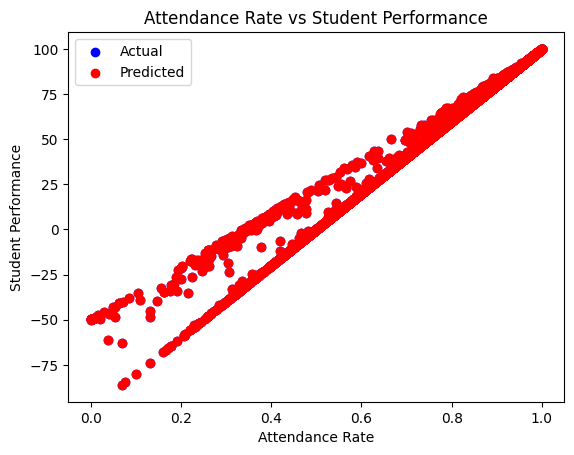

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_test['attendance_rate'], y_test, color='blue', label='Actual')
plt.scatter(X_test['attendance_rate'], y_pred, color='red', label='Predicted')
plt.xlabel('Attendance Rate')
plt.ylabel('Student Performance')
plt.title('Attendance Rate vs Student Performance')
plt.legend()
plt.show()

In [12]:
import joblib
filename ='projectmodel.sav'
joblib.dump(model, filename)

['projectmodel.sav']

In [ ]:
def predict_performance(attendance, absent, release):
    total_days = attendance + absent + release

    attendance_rate = attendance / total_days
    absent_rate = absent / total_days
    release_rate = release / total_days

    input_data = pd.DataFrame({
        'attendance_rate': [attendance_rate],
        'absent_rate': [absent_rate],
        'release_rate': [release_rate]
    })

    predicted_performance = model.predict(input_data)
    return predicted_performance[0]